# 폐암 예측 머신러닝 모델 개발
## 1팀 - 데이터 전처리부터 모델 저장까지

폐암 환자 데이터를 이용한 머신러닝 모델 개발 전 과정

### 프로젝트 구성
1. 데이터 로드 및 탐색적 데이터 분석 (EDA)
2. 데이터 전처리
3. 모델 학습
4. 모델 평가
5. 모델 저장


#### 데이터셋 컬럼 설명

| 컬럼명 | 설명 | 값 |
|--------|------|-----|
| GENDER | 성별 | M (남성), F (여성) |
| AGE | 환자 나이 | 숫자 |
| SMOKING | 흡연 여부 | 2 (예), 1 (아니오) |
| YELLOW_FINGERS | 손가락 황변 | 2 (예), 1 (아니오) |
| ANXIETY | 불안 증상 | 2 (예), 1 (아니오) |
| PEER_PRESSURE | 또래 압력 | 2 (예), 1 (아니오) |
| CHRONIC DISEASE | 만성 질환 | 2 (예), 1 (아니오) |
| FATIGUE | 피로감 | 2 (예), 1 (아니오) |
| ALLERGY | 알레르기 | 2 (예), 1 (아니오) |
| WHEEZING | 천명음 (쌕쌕거림) | 2 (예), 1 (아니오) |
| ALCOHOL CONSUMING | 음주 | 2 (예), 1 (아니오) |
| COUGHING | 기침 | 2 (예), 1 (아니오) |
| SHORTNESS OF BREATH | 호흡 곤란 | 2 (예), 1 (아니오) |
| SWALLOWING DIFFICULTY | 연하 곤란 | 2 (예), 1 (아니오) |
| CHEST PAIN | 흉통 | 2 (예), 1 (아니오) |
| LUNG_CANCER | 폐암 진단 | YES (양성), NO (음성) |



## 1. 필요한 라이브러리 임포트


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix,
    roc_curve,
    roc_auc_score
)
import joblib
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (Mac)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 그래프 스타일 설정
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ 라이브러리 임포트 완료")


✅ 라이브러리 임포트 완료


## 2. 데이터 로드 및 기본 정보 확인


In [3]:
# 데이터 로드
df = pd.read_csv('survey lung cancer.csv')

print("="*60)
print("데이터셋 기본 정보")
print("="*60)
print(f"\n데이터 크기: {df.shape[0]}행 × {df.shape[1]}열")
print(f"\n컬럼 목록:\n{df.columns.tolist()}")
print(f"\n데이터 타입:\n{df.dtypes}")
print(f"\n결측치 개수:\n{df.isnull().sum()}")
print("\n데이터 샘플 (처음 5행):")
df.head()


데이터셋 기본 정보

데이터 크기: 309행 × 16열

컬럼 목록:
['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

데이터 타입:
GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

결측치 개수:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


## 3. 탐색적 데이터 분석 (EDA)


타겟 변수 (LUNG_CANCER) 분포
LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64

비율:
LUNG_CANCER
YES    87.378641
NO     12.621359
Name: proportion, dtype: float64

폐암 양성(YES) 환자: 270명
폐암 음성(NO) 환자: 39명
폐암 양성 환자가 231명 더 많습니다.


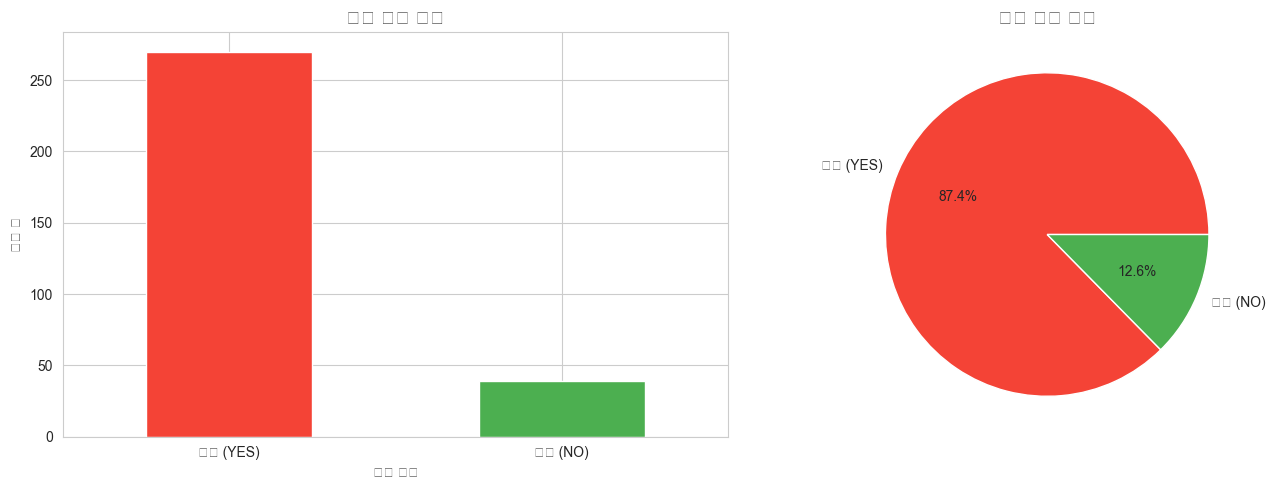

In [4]:
# LUNG_CANCER는 타겟 변수(목표 변수)로, 폐암 진단 결과
# 'YES': 폐암 양성 (폐암이 있음)
# 'NO': 폐암 음성 (폐암이 없음)


# 타겟 변수 분포
print("="*60)
print("타겟 변수 (LUNG_CANCER) 분포")
print("="*60)
print(df['LUNG_CANCER'].value_counts())
print(f"\n비율:\n{df['LUNG_CANCER'].value_counts(normalize=True) * 100}")

# 폐암 양성(YES)과 음성(NO) 환자 수 비교
yes_count = df['LUNG_CANCER'].value_counts()['YES']
no_count = df['LUNG_CANCER'].value_counts()['NO']
print(f"\n폐암 양성(YES) 환자: {yes_count}명")
print(f"폐암 음성(NO) 환자: {no_count}명")
if yes_count > no_count:
    print(f"폐암 양성 환자가 {yes_count - no_count}명 더 많습니다.")
else:
    print(f"폐암 음성 환자가 {no_count - yes_count}명 더 많습니다.")

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 막대 그래프
df['LUNG_CANCER'].value_counts().plot(kind='bar', ax=axes[0], color=['#F44336', '#4CAF50'])
axes[0].set_title('폐암 진단 분포', fontsize=14, fontweight='bold')
axes[0].set_xlabel('진단 결과')
axes[0].set_ylabel('환자 수')
axes[0].set_xticklabels(['양성 (YES)', '음성 (NO)'], rotation=0)

# 파이 차트
df['LUNG_CANCER'].value_counts().plot(
    kind='pie', 
    ax=axes[1], 
    autopct='%1.1f%%',
    colors=['#F44336', '#4CAF50'],
    labels=['양성 (YES)', '음성 (NO)']
)
axes[1].set_title('폐암 진단 비율', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


👥 성별 분포
GENDER
M    162
F    147
Name: count, dtype: int64


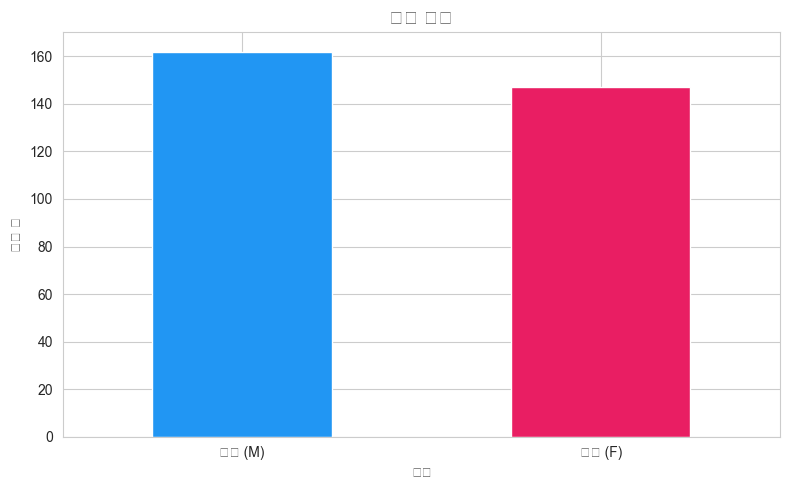

In [5]:
# 성별 분포
print("="*60)
print("👥 성별 분포")
print("="*60)
print(df['GENDER'].value_counts())

# 시각화
plt.figure(figsize=(8, 5))

# 성별 분포
df['GENDER'].value_counts().plot(kind='bar', color=['#2196F3', '#E91E63'])
plt.title('성별 분포', fontsize=14, fontweight='bold')
plt.xlabel('성별')
plt.ylabel('환자 수')
plt.xticks(ticks=[0, 1], labels=['남성 (M)', '여성 (F)'], rotation=0)

plt.tight_layout()
plt.show()


📊 폐암 양성 환자의 연령 및 성별 분포

양성 환자 성별 분포:
GENDER
M    145
F    125
Name: count, dtype: int64


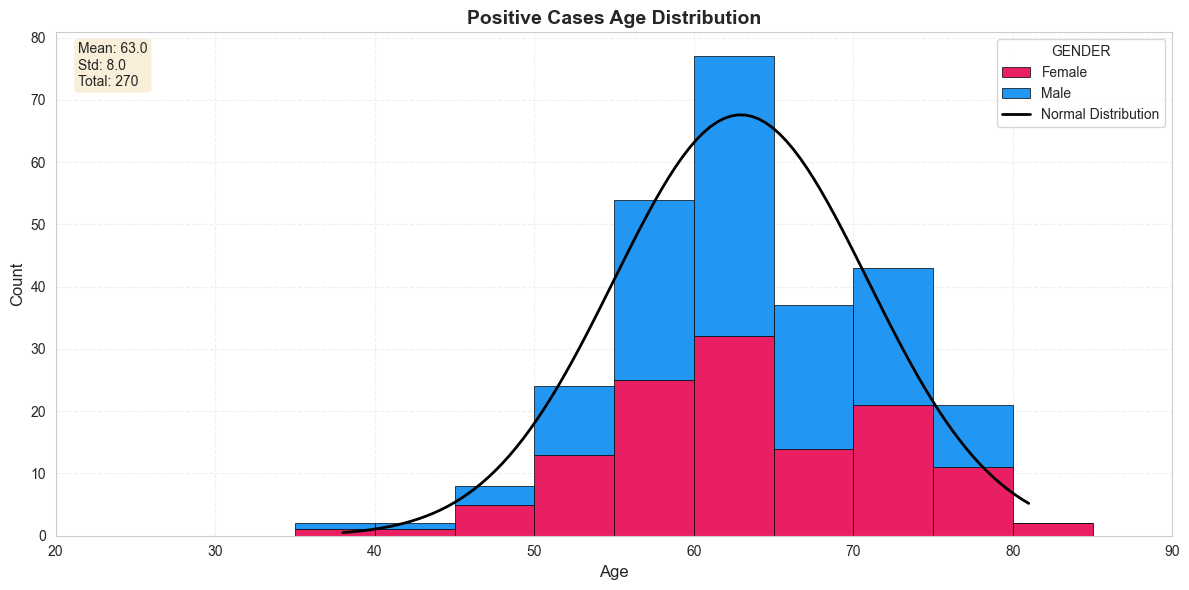


양성 환자 연령 통계:
평균 연령: 62.95세
표준편차: 7.97
최소 연령: 38세
최대 연령: 81세
중앙값: 62.5세


In [6]:
# 폐암 양성 환자의 연령 분포 (성별 구분)
print("="*60)
print("📊 폐암 양성 환자의 연령 및 성별 분포")
print("="*60)

# 폐암 양성 환자만 필터링
positive_cases = df[df['LUNG_CANCER'] == 'YES'].copy()

# 성별별 연령 분포 확인
print("\n양성 환자 성별 분포:")
print(positive_cases['GENDER'].value_counts())

# 시각화
plt.figure(figsize=(12, 6))

# 연령대별 bins 설정
bins = range(20, 90, 5)

# 남성 데이터
male_positive = positive_cases[positive_cases['GENDER'] == 'M']['AGE']
# 여성 데이터
female_positive = positive_cases[positive_cases['GENDER'] == 'F']['AGE']

# 히스토그램 생성 (stacked)
plt.hist([female_positive, male_positive], bins=bins, 
         stacked=True, 
         color=['#E91E63', '#2196F3'],
         label=['Female', 'Male'],
         edgecolor='black',
         linewidth=0.5)

# 정규분포 곡선 추가
from scipy import stats
ages = positive_cases['AGE']
mu, std = ages.mean(), ages.std()
x = np.linspace(ages.min(), ages.max(), 100)
plt.plot(x, stats.norm.pdf(x, mu, std) * len(ages) * 5, 
         'k-', linewidth=2, label='Normal Distribution')

# 그래프 꾸미기
plt.title('Positive Cases Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='GENDER', loc='upper right')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xlim(20, 90)

# 통계 정보 추가
textstr = f'Mean: {mu:.1f}\nStd: {std:.1f}\nTotal: {len(ages)}'
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# 통계 정보 출력
print(f"\n양성 환자 연령 통계:")
print(f"평균 연령: {mu:.2f}세")
print(f"표준편차: {std:.2f}")
print(f"최소 연령: {ages.min()}세")
print(f"최대 연령: {ages.max()}세")
print(f"중앙값: {ages.median()}세")


## 4. 데이터 전처리


In [7]:
print("="*60)
print("🔧 데이터 전처리 시작")
print("="*60)

# 원본 데이터 복사
df_processed = df.copy()

# 1. 성별을 숫자로 변환 (M=1, F=0)
df_processed['GENDER'] = df_processed['GENDER'].map({'M': 1, 'F': 0})
print("✅ 성별 인코딩 완료: M=1, F=0")

# 2. 타겟 변수를 숫자로 변환 (YES=1, NO=0)
df_processed['LUNG_CANCER'] = df_processed['LUNG_CANCER'].map({'YES': 1, 'NO': 0})
print("✅ 타겟 변수 인코딩 완료: YES=1, NO=0")

# 3. 결측치 확인
missing_values = df_processed.isnull().sum()
print(f"\n결측치 개수:\n{missing_values[missing_values > 0] if missing_values.sum() > 0 else '결측치 없음'}")

# 전처리된 데이터 확인
print("\n전처리된 데이터 샘플:")
df_processed.head()


🔧 데이터 전처리 시작
✅ 성별 인코딩 완료: M=1, F=0
✅ 타겟 변수 인코딩 완료: YES=1, NO=0

결측치 개수:
결측치 없음

전처리된 데이터 샘플:


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


📊 상관관계 분석

타겟 변수(LUNG_CANCER)와의 상관관계:
LUNG_CANCER              1.000000
ALLERGY                  0.327766
ALCOHOL CONSUMING        0.288533
SWALLOWING DIFFICULTY    0.259730
WHEEZING                 0.249300
COUGHING                 0.248570
CHEST PAIN               0.190451
PEER_PRESSURE            0.186388
YELLOW_FINGERS           0.181339
FATIGUE                  0.150673
ANXIETY                  0.144947
CHRONIC DISEASE          0.110891
AGE                      0.089465
GENDER                   0.067254
SHORTNESS OF BREATH      0.060738
SMOKING                  0.058179
Name: LUNG_CANCER, dtype: float64


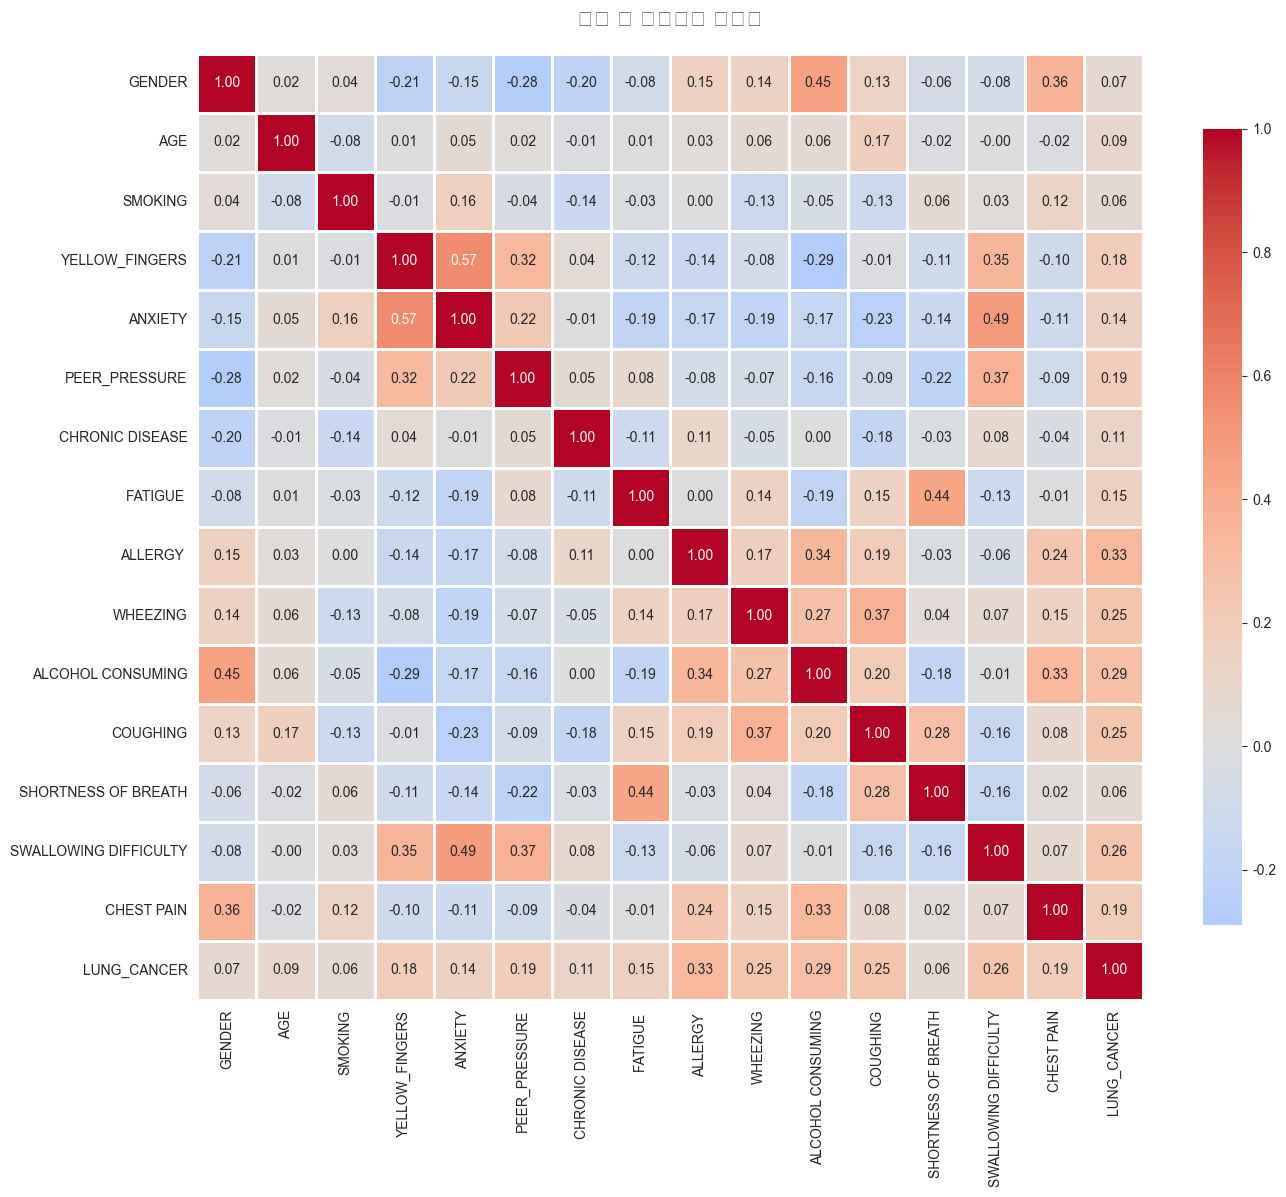

In [8]:
# 상관관계 분석
print("="*60)
print("📊 상관관계 분석")
print("="*60)

# 상관관계 행렬
correlation_matrix = df_processed.corr()

# 타겟 변수와의 상관관계
target_correlation = correlation_matrix['LUNG_CANCER'].sort_values(ascending=False)
print("\n타겟 변수(LUNG_CANCER)와의 상관관계:")
print(target_correlation)

# 히트맵으로 시각화
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('특성 간 상관관계 히트맵', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


## 5. 특성과 타겟 분리 및 데이터 분할


In [9]:
print("="*60)
print("📦 데이터 분할")
print("="*60)

# 특성과 타겟 분리
X = df_processed.drop('LUNG_CANCER', axis=1)
y = df_processed['LUNG_CANCER']

# 특성 이름 저장
feature_names = X.columns.tolist()

print(f"특성(X) 크기: {X.shape}")
print(f"타겟(y) 크기: {y.shape}")
print(f"\n특성 목록:\n{feature_names}")

# 학습/테스트 데이터 분리 (80:20 비율)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n학습 데이터 크기: {X_train.shape}")
print(f"테스트 데이터 크기: {X_test.shape}")
print(f"\n학습 데이터 타겟 분포:\n{y_train.value_counts()}")
print(f"\n테스트 데이터 타겟 분포:\n{y_test.value_counts()}")

print("\n✅ 데이터 분할 완료")


📦 데이터 분할
특성(X) 크기: (309, 15)
타겟(y) 크기: (309,)

특성 목록:
['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

학습 데이터 크기: (247, 15)
테스트 데이터 크기: (62, 15)

학습 데이터 타겟 분포:
LUNG_CANCER
1    216
0     31
Name: count, dtype: int64

테스트 데이터 타겟 분포:
LUNG_CANCER
1    54
0     8
Name: count, dtype: int64

✅ 데이터 분할 완료


## 6. 머신러닝 모델 학습


In [10]:
print("="*60)
print("🤖 RandomForest 모델 학습 시작")
print("="*60)

# RandomForest 모델 생성
model = RandomForestClassifier(
    n_estimators=100,        # 트리 개수
    max_depth=10,            # 트리 최대 깊이
    min_samples_split=5,     # 노드 분할에 필요한 최소 샘플 수
    min_samples_leaf=2,      # 리프 노드의 최소 샘플 수
    random_state=42,         # 재현성을 위한 랜덤 시드
    class_weight='balanced', # 클래스 불균형 처리
    n_jobs=-1                # 모든 CPU 코어 사용
)

print("모델 하이퍼파라미터:")
print(f"  - 트리 개수: {model.n_estimators}")
print(f"  - 최대 깊이: {model.max_depth}")
print(f"  - 최소 분할 샘플: {model.min_samples_split}")
print(f"  - 최소 리프 샘플: {model.min_samples_leaf}")
print(f"  - 클래스 가중치: {model.class_weight}")

# 모델 학습
print("\n모델 학습 중...")
model.fit(X_train, y_train)
print("✅ 모델 학습 완료!")


🤖 RandomForest 모델 학습 시작
모델 하이퍼파라미터:
  - 트리 개수: 100
  - 최대 깊이: 10
  - 최소 분할 샘플: 5
  - 최소 리프 샘플: 2
  - 클래스 가중치: balanced

모델 학습 중...
✅ 모델 학습 완료!


## 7. 모델 평가


In [11]:
print("="*60)
print("📊 모델 성능 평가")
print("="*60)

# 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

# 정확도
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\n학습 데이터 정확도: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"테스트 데이터 정확도: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# 교차 검증
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"\n교차 검증 정확도: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print(f"각 Fold 점수: {cv_scores}")

# 분류 리포트
print("\n" + "="*60)
print("📋 상세 분류 리포트 (테스트 데이터)")
print("="*60)
print(classification_report(y_test, y_test_pred, target_names=['음성 (NO)', '양성 (YES)']))


📊 모델 성능 평가

학습 데이터 정확도: 0.9595 (95.95%)
테스트 데이터 정확도: 0.9194 (91.94%)

교차 검증 정확도: 0.9029 (+/- 0.0527)
각 Fold 점수: [0.92       0.86       0.89795918 0.93877551 0.89795918]

📋 상세 분류 리포트 (테스트 데이터)
              precision    recall  f1-score   support

     음성 (NO)       0.64      0.88      0.74         8
    양성 (YES)       0.98      0.93      0.95        54

    accuracy                           0.92        62
   macro avg       0.81      0.90      0.84        62
weighted avg       0.94      0.92      0.92        62



🔢 혼동 행렬 (Confusion Matrix)
[[ 7  1]
 [ 4 50]]

True Negative (정상→정상): 7
False Positive (정상→폐암): 1
False Negative (폐암→정상): 4
True Positive (폐암→폐암): 50


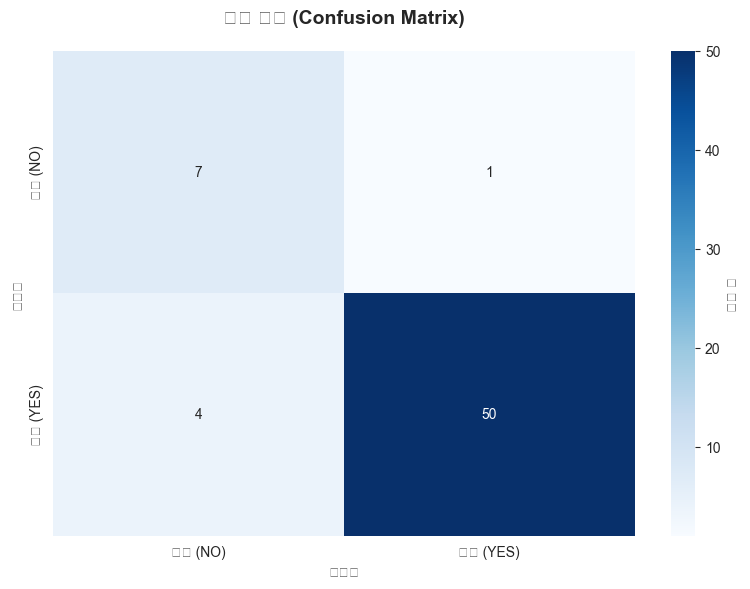

In [12]:
# 혼동 행렬
cm = confusion_matrix(y_test, y_test_pred)

print("="*60)
print("🔢 혼동 행렬 (Confusion Matrix)")
print("="*60)
print(cm)
print(f"\nTrue Negative (정상→정상): {cm[0,0]}")
print(f"False Positive (정상→폐암): {cm[0,1]}")
print(f"False Negative (폐암→정상): {cm[1,0]}")
print(f"True Positive (폐암→폐암): {cm[1,1]}")

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['음성 (NO)', '양성 (YES)'],
            yticklabels=['음성 (NO)', '양성 (YES)'],
            cbar_kws={'label': '샘플 수'})
plt.title('혼동 행렬 (Confusion Matrix)', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('실제값')
plt.xlabel('예측값')
plt.tight_layout()
plt.show()


📈 ROC-AUC Score
ROC-AUC Score: 0.9444


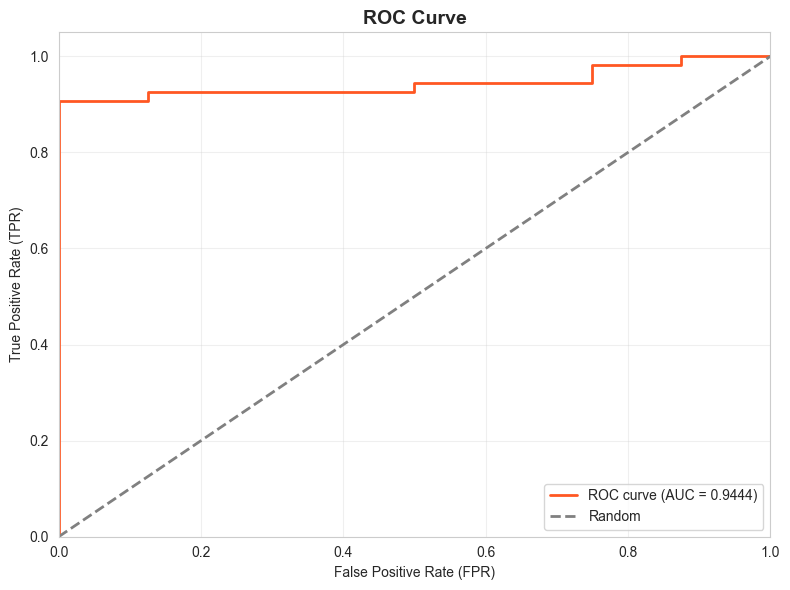

In [13]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

print("="*60)
print("📈 ROC-AUC Score")
print("="*60)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#FF5722', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


🎯 특성 중요도 (Feature Importance)
                  feature feature_kr  importance
8                ALLERGY    ALLERGY     0.150681
10      ALCOHOL CONSUMING         음주    0.111814
5           PEER_PRESSURE      또래 압력    0.094910
1                     AGE         나이    0.093994
9                WHEEZING        천명음    0.073623
11               COUGHING         기침    0.072179
7                FATIGUE    FATIGUE     0.065110
13  SWALLOWING DIFFICULTY       연하곤란    0.062189
3          YELLOW_FINGERS     손가락 황변    0.054773
6         CHRONIC DISEASE      만성 질환    0.053745
14             CHEST PAIN         흉통    0.046323
4                 ANXIETY         불안    0.039274
12    SHORTNESS OF BREATH       호흡곤란    0.033061
0                  GENDER         성별    0.027141
2                 SMOKING         흡연    0.021182


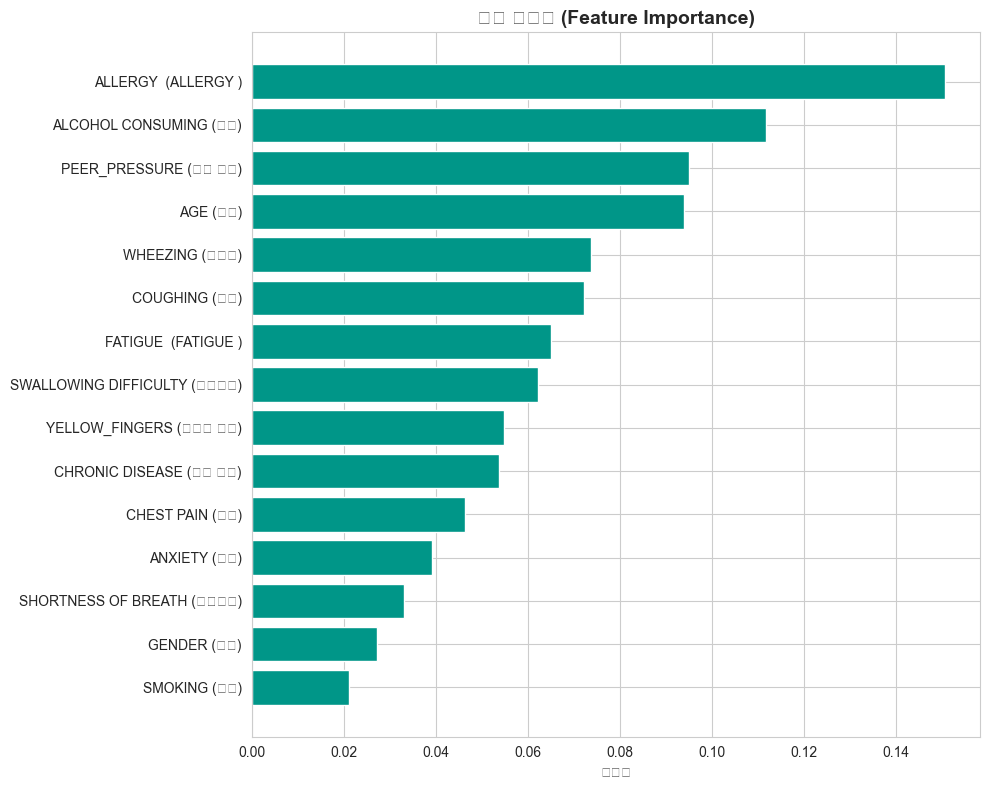

In [15]:
# 특성 중요도
# 한글 이름 매핑
feature_name_mapping = {
    'GENDER': '성별',
    'AGE': '나이',
    'SMOKING': '흡연',
    'YELLOW_FINGERS': '손가락 황변',
    'ANXIETY': '불안',
    'PEER_PRESSURE': '또래 압력',
    'CHRONIC DISEASE': '만성 질환',
    'FATIGUE': '피로',
    'ALLERGY': '알레르기',
    'WHEEZING': '천명음',
    'ALCOHOL CONSUMING': '음주',
    'COUGHING': '기침',
    'SHORTNESS OF BREATH': '호흡곤란',
    'SWALLOWING DIFFICULTY': '연하곤란',
    'CHEST PAIN': '흉통'
}

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'feature_kr': [feature_name_mapping.get(f, f) for f in feature_names],
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("="*60)
print("🎯 특성 중요도 (Feature Importance)")
print("="*60)
print(feature_importance)

# 특성 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importance)), feature_importance['importance'], color='#009688')
# 영문과 한글 이름을 함께 표시
labels = [f"{row['feature']} ({row['feature_kr']})" for _, row in feature_importance.iterrows()]
plt.yticks(range(len(feature_importance)), labels)
plt.xlabel('중요도')
plt.title('특성 중요도 (Feature Importance)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 8. 모델 저장


In [13]:
import os

print("="*60)
print("💾 모델 저장")
print("="*60)

# 저장 디렉토리 생성
model_dir = 'lungcancer/ml_model'
os.makedirs(model_dir, exist_ok=True)

# 모델 저장 경로
model_path = os.path.join(model_dir, 'lung_cancer_model.pkl')
feature_path = os.path.join(model_dir, 'feature_names.pkl')

# 모델과 특성 이름 저장
joblib.dump(model, model_path)
joblib.dump(feature_names, feature_path)

print(f"✅ 모델 저장 완료: {model_path}")
print(f"✅ 특성 이름 저장 완료: {feature_path}")

# 저장된 파일 크기 확인
model_size = os.path.getsize(model_path) / 1024  # KB
feature_size = os.path.getsize(feature_path) / 1024  # KB

print(f"\n모델 파일 크기: {model_size:.2f} KB")
print(f"특성 파일 크기: {feature_size:.2f} KB")


💾 모델 저장
✅ 모델 저장 완료: lungcancer/ml_model/lung_cancer_model.pkl
✅ 특성 이름 저장 완료: lungcancer/ml_model/feature_names.pkl

모델 파일 크기: 372.45 KB
특성 파일 크기: 0.22 KB


## 9. 모델 로드 및 테스트


In [14]:
print("="*60)
print("🔄 저장된 모델 로드 및 테스트")
print("="*60)

# 모델 로드
loaded_model = joblib.load(model_path)
loaded_features = joblib.load(feature_path)

print("✅ 모델 로드 완료")
print(f"\n로드된 특성 개수: {len(loaded_features)}")
print(f"특성 목록: {loaded_features}")

# 로드된 모델로 예측
test_prediction = loaded_model.predict(X_test)
test_accuracy_loaded = accuracy_score(y_test, test_prediction)

print(f"\n로드된 모델 정확도: {test_accuracy_loaded:.4f} ({test_accuracy_loaded*100:.2f}%)")
print("✅ 모델이 정상적으로 작동합니다!")


🔄 저장된 모델 로드 및 테스트
✅ 모델 로드 완료

로드된 특성 개수: 15
특성 목록: ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

로드된 모델 정확도: 0.9194 (91.94%)
✅ 모델이 정상적으로 작동합니다!


## 10. 샘플 예측 예시


In [15]:
print("="*60)
print("🩺 샘플 환자 데이터로 예측 테스트")
print("="*60)

# 테스트 데이터에서 랜덤 샘플 선택
sample_idx = np.random.randint(0, len(X_test))
sample_data = X_test.iloc[sample_idx:sample_idx+1]
actual_result = y_test.iloc[sample_idx]

# 예측
prediction = loaded_model.predict(sample_data)[0]
prediction_proba = loaded_model.predict_proba(sample_data)[0]

print("\n📋 환자 정보:")
for feature, value in zip(loaded_features, sample_data.values[0]):
    if feature == 'GENDER':
        print(f"  - {feature}: {'남성 (M)' if value == 1 else '여성 (F)'}")
    elif feature == 'AGE':
        print(f"  - {feature}: {int(value)}세")
    else:
        print(f"  - {feature}: {'예 (2)' if value == 2 else '아니오 (1)'}")

print(f"\n🎯 실제 진단: {'양성 (YES)' if actual_result == 1 else '음성 (NO)'}")
print(f"🤖 모델 예측: {'양성 (YES)' if prediction == 1 else '음성 (NO)'}")
print(f"\n📊 예측 확률:")
print(f"  - 음성 (NO): {prediction_proba[0]*100:.2f}%")
print(f"  - 양성 (YES): {prediction_proba[1]*100:.2f}%")

if prediction == actual_result:
    print("\n✅ 예측 성공!")
else:
    print("\n❌ 예측 실패")


🩺 샘플 환자 데이터로 예측 테스트

📋 환자 정보:
  - GENDER: 여성 (F)
  - AGE: 64세
  - SMOKING: 예 (2)
  - YELLOW_FINGERS: 예 (2)
  - ANXIETY: 예 (2)
  - PEER_PRESSURE: 아니오 (1)
  - CHRONIC DISEASE: 아니오 (1)
  - FATIGUE : 예 (2)
  - ALLERGY : 예 (2)
  - WHEEZING: 아니오 (1)
  - ALCOHOL CONSUMING: 아니오 (1)
  - COUGHING: 아니오 (1)
  - SHORTNESS OF BREATH: 예 (2)
  - SWALLOWING DIFFICULTY: 아니오 (1)
  - CHEST PAIN: 예 (2)

🎯 실제 진단: 양성 (YES)
🤖 모델 예측: 양성 (YES)

📊 예측 확률:
  - 음성 (NO): 18.64%
  - 양성 (YES): 81.36%

✅ 예측 성공!


## 11. 최종 요약


In [ ]:
print("="*60)
print("📊 프로젝트 최종 요약")
print("="*60)

summary = f"""
🎯 프로젝트명: 폐암 예측 머신러닝 모델 개발
👥 팀명: 1팀

📁 데이터셋 정보:
  - 전체 샘플 수: {len(df)}개
  - 특성 수: {len(feature_names)}개
  - 양성 샘플: {len(df[df['LUNG_CANCER']==1])}개 ({len(df[df['LUNG_CANCER']==1])/len(df)*100:.1f}%)
  - 음성 샘플: {len(df[df['LUNG_CANCER']==0])}개 ({len(df[df['LUNG_CANCER']==0])/len(df)*100:.1f}%)

🤖 모델 정보:
  - 알고리즘: Random Forest Classifier
  - 트리 개수: {model.n_estimators}
  - 최대 깊이: {model.max_depth}

📊 모델 성능:
  - 학습 데이터 정확도: {train_accuracy*100:.2f}%
  - 테스트 데이터 정확도: {test_accuracy*100:.2f}%
  - 교차 검증 정확도: {cv_scores.mean()*100:.2f}% (±{cv_scores.std()*2*100:.2f}%)
  - ROC-AUC Score: {roc_auc:.4f}

💾 저장된 파일:
  - 모델: {model_path}
  - 특성: {feature_path}

✅ 프로젝트 완료!
"""

print(summary)


📊 프로젝트 최종 요약

🎯 프로젝트명: 폐암 예측 머신러닝 모델 개발
👥 팀명: 1팀

📁 데이터셋 정보:
  - 전체 샘플 수: 309개
  - 특성 수: 15개
  - 양성 샘플: 0개 (0.0%)
  - 음성 샘플: 0개 (0.0%)

🤖 모델 정보:
  - 알고리즘: Random Forest Classifier
  - 트리 개수: 100
  - 최대 깊이: 10

📊 모델 성능:
  - 학습 데이터 정확도: 95.95%
  - 테스트 데이터 정확도: 91.94%
  - 교차 검증 정확도: 90.29% (±5.27%)
  - ROC-AUC Score: 0.9444

💾 저장된 파일:
  - 모델: lungcancer/ml_model/lung_cancer_model.pkl
  - 특성: lungcancer/ml_model/feature_names.pkl

✅ 프로젝트 완료!



---
## 🎉 프로젝트 완료!

이 노트북에서 수행한 작업:
1. ✅ 데이터 로드 및 탐색적 데이터 분석 (EDA)
2. ✅ 데이터 전처리 및 인코딩
3. ✅ 상관관계 분석
4. ✅ 데이터 분할 (학습/테스트)
5. ✅ RandomForest 모델 학습
6. ✅ 모델 평가 (정확도, 혼동행렬, ROC-AUC, 특성 중요도)
7. ✅ 모델 저장 및 로드 테스트
8. ✅ 샘플 예측 예시

**다음 단계:** Django 웹 애플리케이션에 이 모델을 통합하여 실시간 폐암 예측 서비스를 제공합니다.

---
*건양대학교 바이오메디컬 1팀 | 2025*
